In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
from src.V1_reconst import reconstruct, generate_Y

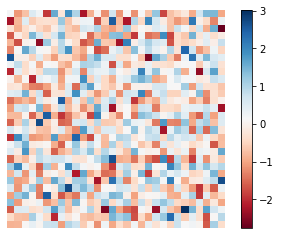

In [80]:
W = np.random.randn(30,30)

ax = plt.imshow(W, 'RdBu')
plt.axis('off')
plt.colorbar(ax)

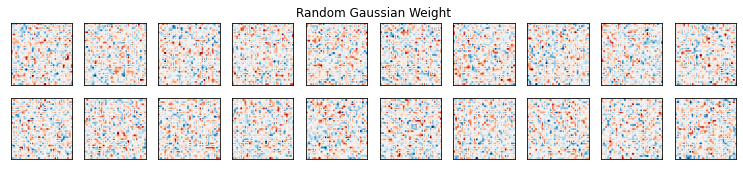

In [81]:
# 2. Plot those V1 weights

fig = plt.figure(figsize = (13, 4))
plt.title('Random Gaussian Weight')
plt.axis('off')
plt.subplots_adjust(top=0.6)
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1)
    cell_rf = np.random.randn(30, 30)
#     cell_rf = cell_rf.reshape(dim)
    plt.imshow(cell_rf, cmap="RdBu")
    plt.clim([-3, 3])
    axes = plt.gca()
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
#     plt.axis('off')
fig.savefig("result/gaussian/weights_figure.png", dpi = 300)

In [82]:
def gaussian_W(num_cell, img_dim):
    n, m = img_dim
    W = np.random.randn(num_cell, n, m)
    return W

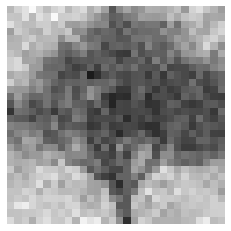

error is 20.128898680356613


In [93]:
img = Image.open("image/tree_part1.jpg")
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)

img_dim = img_arr.shape
n, m = img_dim
num_cell = 500
W = gaussian_W(num_cell, img_dim)
y = generate_Y(W, img_arr)
W_rev = W.reshape(num_cell, n, m)
theta, reconst, s = reconstruct(W_rev, y, 1)
plt.imshow(reconst, 'gray')
plt.clim(0, 255)
plt.axis('off')
# plt.title('Gaussian Method Reconstruction')
# plt.savefig('result/gaussian/gaussian_reconst.png', dpi = 300)
plt.show()
error = np.linalg.norm(img_arr - reconst, 'fro') / np.sqrt(n*m)
print("error is {error}".format(error = error))

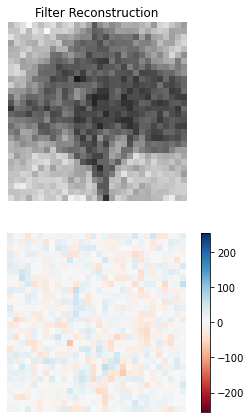

In [94]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout()
fig.subplots_adjust(left=0.27, bottom=None, right=None, top=None, wspace=None, hspace=None)
axs[0].imshow(reconst, 'gray', vmin=0, vmax=255)
axs[0].axis('off')
axs[0].set_title("Filter Reconstruction")
cax = axs[1].imshow(img_arr - reconst, 'RdBu', vmin = -255, vmax = 255)
axs[1].axis('off')
# axs[1].set_title("Error")
fig.colorbar(cax)

In [41]:
img_arr

array([[213, 210, 216, 216, 206, 208, 216, 214, 193, 216, 233, 178, 196,
        141, 117, 134, 176, 112, 167, 160, 186, 213, 190, 177, 203, 182,
        195, 202, 185, 180],
       [220, 206, 204, 208, 208, 214, 215, 204, 228, 227, 203, 159, 174,
        142,  93,  95, 115, 122, 144, 163, 181, 158, 205, 163, 165, 193,
        201, 190, 187, 179],
       [207, 195, 196, 203, 207, 214, 216, 204, 199, 184, 145, 131, 164,
        171, 115, 105,  70, 102, 101, 117, 125,  86, 147, 109, 143, 204,
        196, 176, 195, 194],
       [190, 187, 197, 202, 195, 195, 197, 189, 192, 160, 111,  75, 106,
        124, 100, 101, 108,  96,  96,  93,  93, 100,  99, 117, 146, 189,
        174, 170, 192, 203],
       [198, 194, 200, 202, 190, 180, 169, 152, 183, 172, 167, 112, 129,
        108,  94,  87, 131, 104,  95, 106, 100, 141, 101, 168, 148, 165,
        169, 191, 177, 191],
       [214, 202, 202, 204, 195, 182, 160, 132, 101, 116, 157, 112, 124,
         88,  79,  67,  91, 105,  71, 105, 101, 119,